In [39]:
using ReinforcementLearning, ReinforcementLearningEnvironments, RLIntro.RandomWalk
using StatsBase
using Plots

In [4]:
env = RandomWalkEnv(N=21)
ns = length(observation_space(env))
na = length(action_space(env))
true_values = -1:0.1:1

-1.0:0.1:1.0

In [14]:
struct RecordRMS <: AbstractHook
    rms::Vector{Float64}
    RecordRMS() = new([])
end

(f::RecordRMS)(::PostEpisodeStage, agent, env, obs) = push!(f.rms, sqrt(mean((agent.π.learner.approximator.table[2:end-1] - true_values[2:end-1]).^2)))

In [48]:
function run_once(α, n)
    env = RandomWalkEnv(N=21)
    agent = Agent(
        π=VBasedPolicy(
            learner=TDLearner(
                approximator=TabularVApproximator(fill(0., ns)),
                optimizer=Descent(α),
                method=:SRS,
                n=n
                ),
            f=TabularRandomPolicy(fill(1 / na, ns, na))
            ),
        buffer=episode_RTSA_buffer()
    )
    hook = RecordRMS()
    run(agent, env, StopAfterEpisode(10; is_show_progress=false);hook=hook)
    mean(hook.rms)
end

run_once (generic function with 1 method)

In [33]:
run_once(0.1, 1)

0.5117212678764459

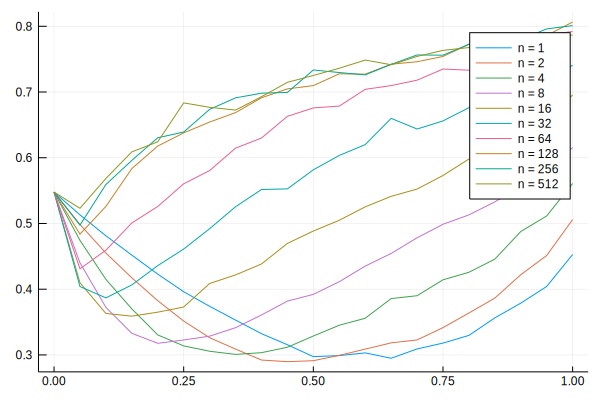

In [51]:
A = 0.:0.05:1.0
p = plot()
for n in [2^i for i in 0:9]
    avg_rms = Float64[]
    for α in A
        rms = []
        for _ in 1:100
            push!(rms, run_once(α, n))
        end
        push!(avg_rms, mean(rms))
    end
    plot!(p, A, avg_rms, label="n = $n")
end
p

ylims!(p, 0.25, 0.55)